### Airline review analysis
The world of aviation industry majorly depends on the ratings and reviews given by other customers. Good ratings attract more customers and vice versa. It is for this reason that most airlines do a review analysis from their clients to asses their position in the market. 

Not only are the reviews reviewed but also the rating given. The airline management and board of directors always fully depend on the data science team for insights gotten from the consumers data analysed. They are the ones who do a follow-up on both the positive and negative issues raised by their consumers. The analysis doesn't only focus on the negative side of it but also on the positive side where employees maybe given promotions depending on the consumer rating. Pilots may also be considered for pay rises and much more. 

### Business Objectives 
Given the airline data, we seek to:
1. Develop a review classification model to classify the reviews into negative, neutral and positive sentiments.
2. Find the most well rated airlines monthly and yearly with good comfort and good customer service.
3. Find the most luxurious airline in terms of seat comfort, food served, wifi connectivity and inflight entertainment.  

### Import libraries

In [60]:
import pandas as pd  
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MultiLabelBinarizer 
from imblearn.over_sampling import  SMOTE
from sklearn.naive_bayes import  MultinomialNB 
from sklearn.ensemble import RandomForestClassifier 
import spacy 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re 
import inflect 
from nltk.stem import WordNetLemmatizer 
# remove stopwords 
import gensim 

from keras.preprocessing.text import Tokenizer 
import tensorflow as tf 
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import pad_sequences

#Multi class classification libraries 
from skmultilearn.problem_transform import BinaryRelevance 
from skmultilearn.problem_transform import ClassifierChain 
from skmultilearn.problem_transform import LabelPowerset 
from skmultilearn.adapt import MLkNN   

sns.set_style('white')

### Data Understanding

In [2]:
origin_df = pd.read_csv("Airline_review.csv")
origin_df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [3]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [4]:
origin_df.isna().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

The **Aircraft**, **Wifi & Connectivity** and **Inflight Entertainment** columns have the highest number of missing values. Columns to be dropped are those which are not tied in any way to our business objectives namely the **Aircraft** column. 

In [5]:
for cols in origin_df.columns:
    print(f"{cols} has {origin_df[cols].nunique()} unique values")

Unnamed: 0 has 23171 unique values
Airline Name has 497 unique values
Overall_Rating has 10 unique values
Review_Title has 17219 unique values
Review Date has 4557 unique values
Verified has 2 unique values
Review has 23046 unique values
Aircraft has 1048 unique values
Type Of Traveller has 4 unique values
Seat Type has 4 unique values
Route has 13607 unique values
Date Flown has 109 unique values
Seat Comfort has 6 unique values
Cabin Staff Service has 6 unique values
Food & Beverages has 6 unique values
Ground Service has 5 unique values
Inflight Entertainment has 6 unique values
Wifi & Connectivity has 6 unique values
Value For Money has 6 unique values
Recommended has 2 unique values


The **Review Date** column is not a **Date time** object and it is therefore necessary to extract the year column. 

In [6]:
origin_df.duplicated().sum()

0

The dataset has no duplicate values.

In [7]:

origin_df.drop(columns=['Wifi & Connectivity','Inflight Entertainment','Ground Service','Seat Comfort','Cabin Staff Service','Food & Beverages'],
               inplace=True)

### Feature engineering & Explorative Data Analysis 

In [8]:
eda_df = origin_df.copy()
eda_df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,no


In [9]:
eda_df['Year'] = eda_df['Review Date'].apply(lambda x: x[-4:]).astype(int)
eda_df['Month'] = eda_df['Review Date'].apply(lambda x: x.split()[1])


To get the Review **Months** and **Years**, engineering new features from the **Review date** column is necessary. 

In [10]:
eda_df["Overall_Rating"].value_counts()

1    11595
2     2296
9     1768
8     1757
3     1356
7     1193
4      859
n      842
5      830
6      675
Name: Overall_Rating, dtype: int64

In [11]:
eda_df["Overall_Rating"] = eda_df["Overall_Rating"].replace({'n':10})

In [13]:

eda_df["Overall_Rating"] = eda_df["Overall_Rating"].astype(int)

for i in range(len(eda_df["Overall_Rating"])):
    if eda_df["Overall_Rating"][i] > 7:
        eda_df["Overall_Rating"][i] = 2
    elif eda_df["Overall_Rating"][i] > 4:
        eda_df["Overall_Rating"][i] = 1
    else:
        eda_df["Overall_Rating"][i] = 0 

C:\Users\user\AppData\Local\Temp\ipykernel_7568\978556354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df["Overall_Rating"][i] = 2
C:\Users\user\AppData\Local\Temp\ipykernel_7568\978556354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df["Overall_Rating"][i] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_7568\978556354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df["Overall_Rating"][i] = 1


In [14]:
eda_df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Value For Money,Recommended,Year,Month
0,0,AB Aviation,2,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,3.0,yes,2019,November
1,1,AB Aviation,0,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,no,2019,June
2,2,AB Aviation,0,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,no,2019,June
3,3,Adria Airways,0,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,no,2019,September
4,4,Adria Airways,0,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,no,2019,September


In [15]:
ratings_grp = eda_df.groupby('Airline Name')['Overall_Rating'].agg('mean').sort_values(ascending=False).head(25)
ratings_grp 

Airline Name
Mack Air              2.000000
Hunnu Air             2.000000
Nile Air              2.000000
Nauru Airlines        2.000000
Henan Airlines        2.000000
Europe Airpost        2.000000
Badr Airlines         2.000000
Eswatini Air          2.000000
Tibet Airlines        2.000000
Air Costa             2.000000
Conviasa              2.000000
Aero VIP              2.000000
Manta Air             2.000000
Qazaq Air             2.000000
Jazz                  1.800000
Moldavian Airlines    1.800000
TransAsia Airways     1.714286
Eritrean Airlines     1.666667
Myanmar Airways       1.592593
Trigana Air           1.500000
Safarilink            1.500000
Felix Airways         1.500000
Mandarin Airlines     1.500000
SCAT Airlines         1.500000
Air Djibouti          1.500000
Name: Overall_Rating, dtype: float64

In [16]:
ratings_grp2 = eda_df.groupby('Airline Name')['Overall_Rating'].agg('mean').sort_values(ascending=True).head(25)
ratings_grp2

Airline Name
Madagasikara Airways         0.0
BoraJet                      0.0
Mauritania Airlines          0.0
Maya Island Air              0.0
JC International Airlines    0.0
Cambodia Bayon Airlines      0.0
NextJet                      0.0
Air Cote d'Ivoire            0.0
Camair-Co                    0.0
Sun-Air                      0.0
Iberojet                     0.0
Air Rarotonga                0.0
Sudan Airways                0.0
Air Iceland Connect          0.0
Pan Pacific Airlines         0.0
Himalaya Airlines            0.0
Bluebird Airways             0.0
Sol Líneas Aéreas            0.0
Smartavia                    0.0
Air Labrador                 0.0
KD Air                       0.0
Grand Cru Airlines           0.0
FMI Air                      0.0
FLYONE                       0.0
Rhein-Neckar Air             0.0
Name: Overall_Rating, dtype: float64

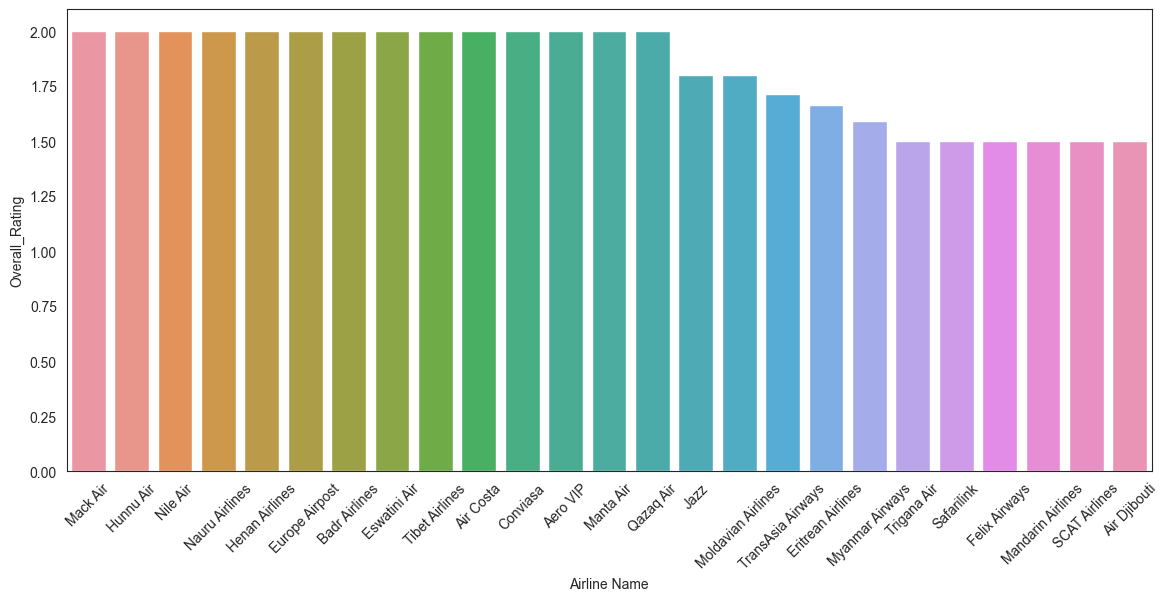

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(data=ratings_grp.reset_index(), x='Airline Name', y='Overall_Rating')
plt.xticks(rotation=45)
plt.show()

In [18]:
yearly_group = eda_df.groupby(['Airline Name','Year'])['Overall_Rating'].agg('mean').sort_values(ascending=False).head(60)
print(yearly_group) 

Airline Name          Year
Air Costa             2015    2.0
S7 Siberia Airlines   2013    2.0
Air Koryo             2006    2.0
                      2004    2.0
Libyan Airlines       2007    2.0
Air KBZ               2019    2.0
                      2017    2.0
Airnorth              2018    2.0
Libyan Airlines       2012    2.0
TAAG Angola Airlines  2006    2.0
Dniproavia            2012    2.0
S7 Siberia Airlines   2014    2.0
TAAG Angola Airlines  2014    2.0
Edelweiss Air         2003    2.0
Dragonair             2017    2.0
Jazz                  2018    2.0
Luxair                2004    2.0
TAG Airlines          2016    2.0
Luxair                2005    2.0
TAME                  2004    2.0
                      2005    2.0
                      2006    2.0
Cayman Airways        2014    2.0
Rwandair              2010    2.0
Libyan Airlines       2005    2.0
SyrianAir             2006    2.0
                      2005    2.0
Airnorth              2013    2.0
Air Madagascar       

In [19]:
monthly_grp = eda_df.groupby(['Airline Name','Month'])['Overall_Rating'].agg('mean').sort_values(ascending=False).head(0)
monthly_grp  

Series([], Name: Overall_Rating, dtype: float64)

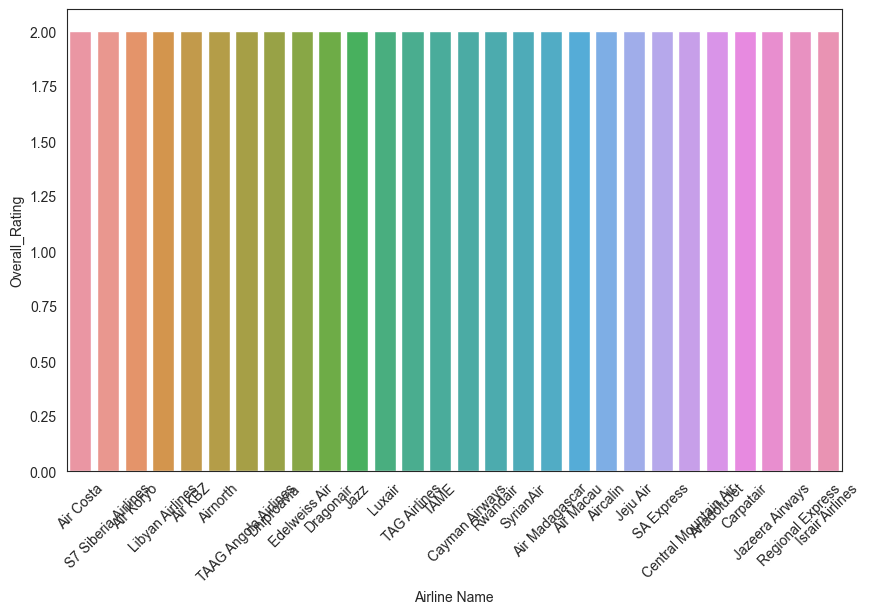

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=yearly_group.reset_index(), x='Airline Name', y='Overall_Rating')
plt.xticks(rotation=45)
plt.show()

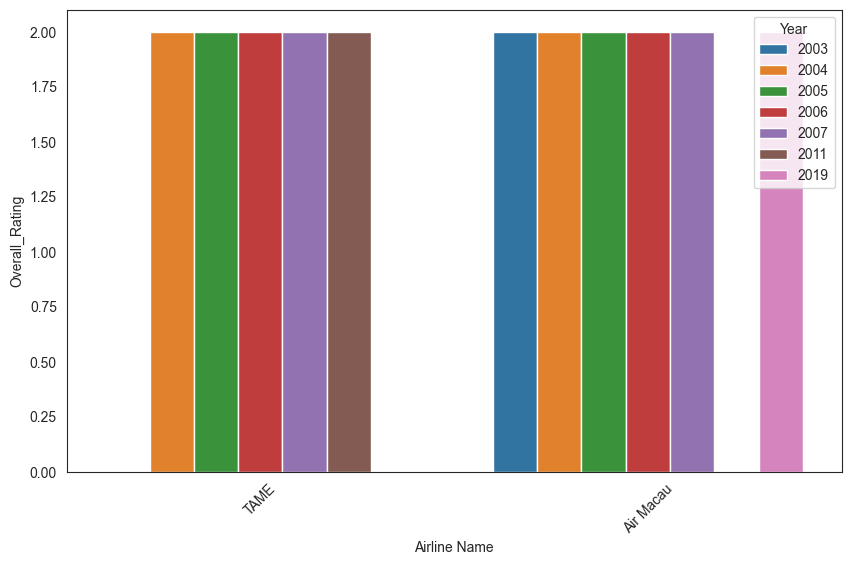

In [21]:
# Plot the airlines with a 2.0 rating for four consecutive years
selected_airline = ['Air Macau','TAME','Air Djibouti']
selected_airlines_df = yearly_group.reset_index()[yearly_group.reset_index()['Airline Name'].isin(selected_airline)]
plt.figure(figsize=(10,6))
sns.barplot(data=selected_airlines_df, x='Airline Name', y='Overall_Rating', hue='Year')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Top airlines by seat ratings 
seats_group = eda_df.groupby(['Seat Type','Airline Name'])['Overall_Rating'].agg(['mean','count']).sort_values(by='mean',ascending=False).head(40)
print(seats_group)

                                       mean  count
Seat Type       Airline Name                      
Economy Class   Qazaq Air               2.0      2
First Class     Luxair                  2.0      1
                Jetstar Asia            2.0      1
Business Class  Nepal Airlines          2.0      1
Premium Economy Regional Express        2.0      1
                Dragonair               2.0      2
Economy Class   Henan Airlines          2.0      1
Premium Economy Rex Airlines            2.0      1
                CityJet                 2.0      1
First Class     TAAG Angola Airlines    2.0      1
Economy Class   Hunnu Air               2.0      1
Premium Economy SkyWest Airlines        2.0      1
First Class     Qatar Airways           2.0      1
Economy Class   Carpatair               2.0      1
                Air Costa               2.0      1
First Class     SmartWings              2.0      1
Business Class  Conviasa                2.0      1
Economy Class   Tibet Airlines 

In [23]:
best_airlines_by_seat_type = seats_group.groupby('Seat Type')['mean'].idxmax().reset_index()

print(best_airlines_by_seat_type)


         Seat Type                                 mean
0   Business Class     (Business Class, Nepal Airlines)
1    Economy Class           (Economy Class, Qazaq Air)
2      First Class                (First Class, Luxair)
3  Premium Economy  (Premium Economy, Regional Express)


In [24]:
seats_group2 = eda_df.groupby(['Seat Type','Airline Name'])['Overall_Rating'].agg(['mean','count']).sort_values(by='count',ascending=True).head(40)
print(seats_group2)

                                           mean  count
Seat Type       Airline Name                          
Premium Economy flydubai                    0.0      1
Economy Class   Henan Airlines              2.0      1
Business Class  flyadeal                    0.0      1
                flydubai                    0.0      1
Premium Economy Africa World Airlines       0.0      1
Economy Class   AeroItalia                  0.0      1
                Aerocaribbean               2.0      1
First Class     Yemenia                     1.0      1
                VivaAerobús                 2.0      1
                Tigerair Australia          0.0      1
                Tianjin Airlines            2.0      1
                Thai Smile Airways          2.0      1
                TAP Portugal                0.0      1
                TAM Airlines                1.0      1
                TAAG Angola Airlines        2.0      1
Premium Economy Air Austral                 2.0      1
First Clas

### Modelling 

In [25]:

modelling_df= origin_df[['Overall_Rating','Review']].copy()
modelling_df.head()

,Overall_Rating,Review
0,9,Moroni to Moheli. Turned out to be a pretty ...
1,1,Moroni to Anjouan. It is a very small airline...
2,1,Anjouan to Dzaoudzi. A very small airline an...
3,1,Please do a favor yourself and do not fly wi...
4,1,Do not book a flight with this airline! My fr...


In [26]:
modelling_df['Overall_Rating'] = modelling_df['Overall_Rating'].replace({'n':10}).astype(int)

In [27]:
def rating_cats(data):
    for cols in range(len(data)):
        if data.iloc[cols] > 7:
            data.iloc[cols] = 2
        elif data.iloc[cols] > 4:
            data.iloc[cols] = 1
        else:
            data.iloc[cols] = 0 
    
    return data 

modelling_df['Overall_Rating'] = modelling_df['Overall_Rating'].astype(int)

modelling_df['Overall_Rating'] = rating_cats(modelling_df['Overall_Rating'])

C:\Users\user\AppData\Local\Temp\ipykernel_7568\2258736019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[cols] = 2
C:\Users\user\AppData\Local\Temp\ipykernel_7568\2258736019.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[cols] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_7568\2258736019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[cols] = 1


In [28]:
modelling_df['Overall_Rating'].value_counts()

0    16106
2     4367
1     2698
Name: Overall_Rating, dtype: int64

In [45]:
text = modelling_df['Review'] 
label = modelling_df['Overall_Rating']

In [48]:


X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)

In [50]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [64]:
from sklearn.metrics import accuracy_score
def modelling(model, X_train, X_test, y_train, y_test):
    sm = SMOTE()
    X_train_r, y_train_r = sm.fit_resample(X_train, y_train)
    model.fit(X_train_r, y_train_r) 
    y_pred_train = model.predict(X_train_r)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train_r, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print("Training Accuracy:", acc_train)
    print("Testing Accuracy:", acc_test)

    print("Classification Report on Test Data:")
    print(classification_report(y_test, y_pred_test))

    return model 

In [65]:
lr1 = LogisticRegression()
modelling(lr1, X_train,X_test, y_train, y_test)

Training Accuracy: 0.9058437362694166
Testing Accuracy: 0.7288025889967638
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3209
           1       0.37      0.45      0.41       560
           2       0.49      0.58      0.53       866

    accuracy                           0.73      4635
   macro avg       0.59      0.62      0.60      4635
weighted avg       0.76      0.73      0.74      4635



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
from xgboost import XGBClassifier 
xgb = XGBClassifier() 
modelling(xgb, X_train, X_test, y_train, y_test) 

Training Accuracy: 0.9330852136155695
Testing Accuracy: 0.7430420711974111
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3209
           1       0.44      0.26      0.33       560
           2       0.51      0.51      0.51       866

    accuracy                           0.74      4635
   macro avg       0.60      0.55      0.57      4635
weighted avg       0.72      0.74      0.73      4635



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
rf = RandomForestClassifier(class_weight='balanced')
modelling(rf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.9999741541960663
Testing Accuracy: 0.7395900755124056
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3209
           1       0.44      0.12      0.19       560
           2       0.50      0.49      0.49       866

    accuracy                           0.74      4635
   macro avg       0.58      0.51      0.51      4635
weighted avg       0.71      0.74      0.71      4635



RandomForestClassifier(class_weight='balanced')

In [68]:
mb = MultinomialNB()
modelling(mb, X_train, X_test, y_train, y_test) 

Training Accuracy: 0.8379209635315706
Testing Accuracy: 0.6973031283710895
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      3209
           1       0.31      0.51      0.39       560
           2       0.48      0.56      0.52       866

    accuracy                           0.70      4635
   macro avg       0.57      0.61      0.58      4635
weighted avg       0.76      0.70      0.72      4635



MultinomialNB()

In [56]:
reviews = modelling_df['Review']
ratings = modelling_df['Overall_Rating']
# Tokenize the reviews 
tokenizer = Tokenizer(num_words=2000) 
tokenizer.fit_on_texts(reviews)

sequences = tokenizer.texts_to_sequences(reviews)

padding = pad_sequences(sequences, maxlen=2000)


### Spacy

In [69]:
nlp = spacy.load("en_core_web_lg")
modelling_df['vectors'] = modelling_df['Review'].apply(lambda text:nlp(text).vector)
modelling_df.head()

,Overall_Rating,Review,vectors
0,2,Moroni to Moheli. Turned out to be a pretty ...,"[-1.8445138, 0.9369775, -3.0179431, -0.4655839..."
1,0,Moroni to Anjouan. It is a very small airline...,"[-1.744216, 1.3142066, -2.417209, -0.88478297,..."
2,0,Anjouan to Dzaoudzi. A very small airline an...,"[-2.6389308, -0.39667344, -1.2942715, 0.497734..."
3,0,Please do a favor yourself and do not fly wi...,"[-1.8041388, 0.3545783, -1.9140779, -0.1750538..."
4,0,Do not book a flight with this airline! My fr...,"[-1.4846054, 1.072488, -2.0151446, 0.10563708,..."


In [70]:
X_tr, X_val, y_tr, y_val = train_test_split(modelling_df.vectors.values,
                                            modelling_df.Overall_Rating,
                                            random_state=42,
                                            test_size=0.25)

In [71]:

X_tr_2 = np.stack(X_tr)
X_val_2 = np.stack(X_val)

In [72]:
X_val_2

array([[-1.3116918 ,  2.895503  , -3.08907   , ...,  0.5663674 ,
        -4.17515   ,  1.7550393 ],
       [-1.535977  ,  1.4083931 , -2.4807806 , ..., -0.36442515,
        -3.267411  ,  1.4750876 ],
       [-1.6494254 ,  0.58483434, -2.4516857 , ..., -0.7003807 ,
        -2.564366  ,  0.4537899 ],
       ...,
       [-1.3205495 ,  0.8009889 , -2.5909758 , ...,  0.22304869,
        -3.477694  ,  1.7259746 ],
       [-2.0128717 ,  0.60044485, -1.6970723 , ..., -1.6421243 ,
        -2.7746603 ,  0.9191224 ],
       [-1.3877503 , -0.45968768, -2.0215373 , ..., -0.4336222 ,
        -2.3309927 ,  0.9044374 ]], dtype=float32)

In [73]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_tr_2)
scaled_test = scaler.transform(X_val_2)

In [75]:
sm = SMOTE()
X_train_resamp, y_train_resamp = sm.fit_resample(scaled_train, y_tr)

In [79]:

# clf2 = MultinomialNB()
# clf2.fit(scaled_train, scaled_test)
def modelling_spacy(model, X_train, X_test, y_train, y_test): 
    # Scale your features using MinMaxScaler
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(X_train)
    scaled_test = scaler.transform(X_test)
    
    # Apply SMOTE to address class imbalance
    smote = SMOTE()
    X_train_resamp, y_train_resamp = smote.fit_resample(scaled_train, y_train)
    
    # Create and fit the model on the resampled training data
    model_instance = model
    model_instance.fit(X_train_resamp, y_train_resamp)
    
    # Make predictions on the test set
    y_pred = model_instance.predict(scaled_test)
    
    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    return model_instance  


In [80]:
clf2 = MultinomialNB()
modelling_spacy(clf2, X_tr_2, X_val_2, y_tr, y_val) 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.77      3985
           1       0.24      0.33      0.28       707
           2       0.37      0.53      0.44      1101

    accuracy                           0.63      5793
   macro avg       0.49      0.52      0.50      5793
weighted avg       0.69      0.63      0.65      5793

Accuracy Score: 0.6255825996892802


MultinomialNB()